In [1]:
#scraping
import pandas as pd
import requests
from bs4 import BeautifulSoup
from string import ascii_lowercase
import time
import ast

#data cleaning and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get data

## Data collection

In [171]:
#Input keywords
cyc_keywords = ["why do cyclists " + c for c in ascii_lowercase]
driver_keywords = ["why do drivers " + c for c in ascii_lowercase]
truck_driver_keywords = ["why do truck drivers " + c for c in ascii_lowercase]
bus_driver_keywords = ["why do bus drivers " + c for c in ascii_lowercase]
all_keywords = {"cyclists": cyc_keywords, "drivers" :driver_keywords, "truck_drivers" :truck_driver_keywords,
                "bus_drivers": bus_driver_keywords}
country = "uk" 

In [172]:
#get all suggestions from Google search autocomplete
data = { "cyclists" : [], "drivers":[], "truck_drivers" :[],  "bus_drivers":[]}

for roaduser in data.keys():
    keywords = all_keywords[roaduser]
    for kw in keywords:
        r = requests.get('http://suggestqueries.google.com/complete/search?output=toolbar&hl={}&q={}'.format(country,kw))
        soup = BeautifulSoup(r.content, 'html.parser')
        sugg = [sugg['data'] for sugg in soup.find_all('suggestion')]
        data[roaduser].append(sugg[0:12])
        time.sleep(0.2)

## Data cleaning

In [173]:
#convert to dataframe
df = pd.DataFrame.from_dict(data)
df["letter"] = [c.upper() for c in ascii_lowercase]
df = df.rename(columns={"cyclists":"cyclists_raw", "drivers":"drivers_raw", "truck_drivers":"truck_drivers_raw",
                       "bus_drivers": "bus_drivers_raw"})

In [174]:
#get one entry to visualise later
df["cyclists"]=df["cyclists_raw"].str[0]
df["cyclists"].iloc[5] = ""
df["cyclists"].iloc[10] = df["cyclists_raw"].iloc[10][6]
df["cyclists"].iloc[12] = ""
df["cyclists"].iloc[14] = "why do cyclists only have one headlight on"
df["cyclists"].iloc[16] = df["cyclists_raw"].iloc[16][3]
df["cyclists"].iloc[23] = ""
df["cyclists"].iloc[24] =  df["cyclists_raw"].iloc[24][5]

df["drivers"]=df["drivers_raw"].str[0]
df["drivers"].iloc[0] = ""
df["drivers"].iloc[9] = ""
df["drivers"].iloc[10] = ""
df["drivers"].iloc[11]=df["drivers_raw"].iloc[11][2]
df["drivers"].iloc[12] = ""
df["drivers"].iloc[15] = ""
df["drivers"].iloc[16] = "Why do drivers quit uber"
df["drivers"].iloc[21] = ""
df["drivers"].iloc[23] = ""
df["drivers"].iloc[24] = ""
df["drivers"].iloc[25] = ""

df["truck_drivers"]=df["truck_drivers_raw"].str[0]
df["truck_drivers"].iloc[1] =df["truck_drivers_raw"].iloc[1][1]
df["truck_drivers"].iloc[9] = ""
df["truck_drivers"].iloc[21] = ""
df["truck_drivers"].iloc[23] = ""
df["truck_drivers"].iloc[24] = ""
df["truck_drivers"].iloc[25] = ""

df["bus_drivers"]=df["bus_drivers_raw"].str[0]
df["bus_drivers"].iloc[4] = ""
df["bus_drivers"].iloc[5] = ""
df["bus_drivers"].iloc[10] = "Why do bus drivers know how much money you put in"
df["bus_drivers"].iloc[12] = ""
df["bus_drivers"].iloc[19] = ""
df["bus_drivers"].iloc[20] = ""
df["bus_drivers"].iloc[21] = ""
df["bus_drivers"].iloc[23] = ""
df["bus_drivers"].iloc[24] = ""
df["bus_drivers"].iloc[25] = ""

In [177]:
df.head()

,cyclists_raw,drivers_raw,truck_drivers_raw,bus_drivers_raw,letter,cyclists,drivers,truck_drivers,bus_drivers
0,[why do cyclists and walkers perceive their en...,"[what is drivers abstract, what are drivers an...","[why do truck drivers always look at me, why d...","[why do bus drivers always wave at each other,...",A,why do cyclists and walkers perceive their env...,,why do truck drivers always look at me,why do bus drivers always wave at each other
1,"[why do cyclists bend forward, why do cyclists...","[why do drivers brake check, why do drivers br...",[why do pickup drivers back into parking space...,"[why do bus drivers brake so hard, why do bus ...",B,why do cyclists bend forward,why do drivers brake check,why do truck drivers have bobbleheads,why do bus drivers brake so hard
2,"[why do cyclists clip in, why does carb cyclin...","[why do drivers cancel uber, why do drivers cu...","[why do truck drivers cheat, what do truck dri...","[why do bus drivers chairs bounce, why do truc...",C,why do cyclists clip in,why do drivers cancel uber,why do truck drivers cheat,why do bus drivers chairs bounce
3,"[why do cyclists die in their sleep, why do cy...",[why do drivers drive their car slowly during ...,"[why do truck drivers die early, why do truck ...","[why do bus drivers drive so slow, why do bus ...",D,why do cyclists die in their sleep,why do drivers drive their car slowly during r...,why do truck drivers die early,why do bus drivers drive so slow
4,"[why do cyclists eat rice cakes, why do cyclis...","[why do drivers exceed speed limits, why is dr...","[why do truck drivers earn so much, what do tr...","[what do truck drivers earn, what does a truck...",E,why do cyclists eat rice cakes,why do drivers exceed speed limits,why do truck drivers earn so much,


# Visualisation

Useful code and tutorials

- [Create circle with evenly distributed dots](https://stackoverflow.com/questions/50939065/how-to-create-a-circle-with-uniformly-distributed-dots-in-the-perimeter-of-it-wi)
- [Draw curved lines to connect points](https://stackoverflow.com/questions/63560005/draw-curved-lines-to-connect-points-in-matplotlib)
- [Matplotlib path tutorial](https://matplotlib.org/stable/tutorials/advanced/path_tutorial.html)

In [272]:
from matplotlib.path import Path
import matplotlib.patches as patches

## Calculate layout positions

In [700]:
# calculate position in a circle
n_dots = 57   # set number of dots
angs = np.linspace(0, 2*np.pi, n_dots)  # angles to the dots

ra = 35.0          # radius of circle
cx, cy = (ra, ra)  # center of circle
xs, ys = [], []    # for coordinates of points to plot

half_circle = list(angs[:13][::-1]) + list(angs[43:-1][::-1])
for ang in half_circle:
    x = cx + ra*np.cos(ang)
    y = cy + ra*np.sin(ang)
    xs.append(x)  
    ys.append(y)   

df["x_circle"] = xs
df["y_circle"] = ys

# offset for less circular shape
df["y_offset"] = [(y - ra) / 30 for y in df["y_circle"]]
df["x_offset"] = [(x - ra) / 10 for x in df["x_circle"]]

# inputs for final chart
height = 26         
width = 10

#positions for letters on a straight line with circular offset
df["x_pos"] = width + df["x_offset"]
df["y_pos"] = [26 - i +  df["y_offset"].iloc[i] for i in range(len(df))]

## Chart

In [668]:
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\taile.ttf',
 'C:\\Windows\\Fonts\\ARIALNI.TTF',
 'C:\\WINDOWS\\Fonts\\Metropolis-SemiBoldItalic.otf',
 'C:\\WINDOWS\\Fonts\\msgothic.ttc',
 'C:\\Windows\\Fonts\\Metropolis-RegularItalic.otf',
 'C:\\WINDOWS\\Fonts\\framdit.ttf',
 'C:\\Windows\\Fonts\\Raleway-Medium.ttf',
 'C:\\WINDOWS\\Fonts\\ebrimabd.ttf',
 'C:\\Windows\\Fonts\\tahomabd.ttf',
 'C:\\WINDOWS\\Fonts\\Ubuntu-R.ttf',
 'C:\\Windows\\Fonts\\MandaloreExpandedItalic-Rpprl.otf',
 'C:\\Windows\\Fonts\\Inter-SemiBoldItalic.otf',
 'C:\\WINDOWS\\Fonts\\gadugib.ttf',
 'C:\\Windows\\Fonts\\mvboli.ttf',
 'C:\\WINDOWS\\Fonts\\UbuntuMono-R.ttf',
 'C:\\Windows\\Fonts\\UbuntuMono-BI.ttf',
 'C:\\Windows\\Fonts\\Inter-ExtraBoldItalic.otf',
 'C:\\WINDOWS\\Fonts\\Roboto-MediumItalic.ttf',
 'C:\\Windows\\Fonts\\Candaraz.ttf',
 'C:\\WINDOWS\\Fonts\\GOTHIC.TTF',
 'C:\\WINDOWS\\Fonts\\JetBrainsMono-ThinItalic.ttf',
 'C:\\WINDOWS\\Fonts\\GothamBook.ttf',
 'C:\\WINDOWS\\Fonts\\MYRIADPRO-BOLDIT.OTF',
 'C:\\Windows\\Fonts\\Ralewa

In [710]:
#fonts
from matplotlib import font_manager

font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
subtitle_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Inter-Medium.otf')
letter_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\Take cover.ttf')
label_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\OpenSans-Medium.ttf')

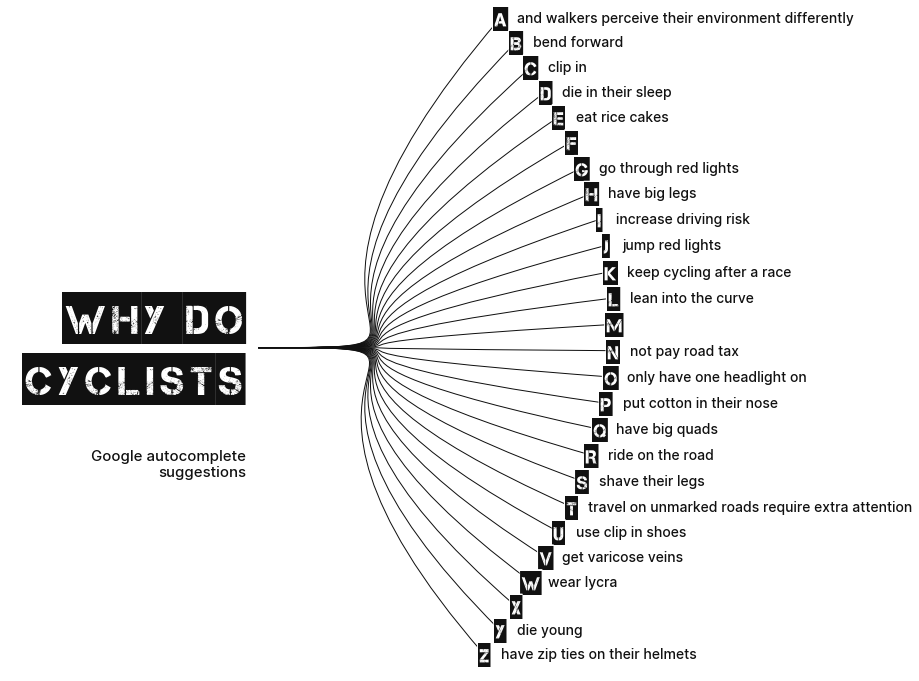

In [715]:
#===== PLOT
fig,ax = plt.subplots(figsize=(12, 12))

# plot data

#center
center_x, center_y = (5, height/2)  # center of circle
ax.text(center_x -0.3, center_y,"Why do\ncyclists" , va="center",ha="right",
           fontsize=50, fontproperties=letter_font, color="#111111")

ax.text(center_x -0.3, center_y-5,"Google autocomplete\nsuggestions" , va="center",ha="right",
           fontsize=15, fontproperties=subtitle_font, color="#111111")

#ax.scatter(center_x ,center_y, c="black", s=20)

indent=5
for i in range(len(df)):
    x_pos = df["x_pos"].iloc[i] 
    y_pos = df["y_pos"].iloc[i] 
    
    #lines from center point outwards using Bezier curve
    verts = [(center_x, center_y), (center_x +indent*1.2, center_y), (center_x -indent*0.2, center_y), (x_pos, y_pos)] 
    codes = [Path.MOVETO] + [Path.CURVE4] * 3
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor='#111111')
    ax.add_patch(patch)
    
    #plot letter
    ax.text(x_pos , y_pos,df["letter"].iloc[i] , va="center",ha="center",
           fontsize=23, fontproperties=letter_font,color="#111111",
           bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.03')
           )
    
    #plot text
    ax.text(x_pos+0.4 , y_pos,df["cyclists"].iloc[i].replace("why do cyclists ", "") , va="center",ha="left",
           fontsize=14, fontproperties=subtitle_font, color='#111111')

#configuredf
ax.set_ylim(-1, height+1)
ax.set_xlim(-1, width+5)
ax.axis("off")

#=====
#Title and footer
# Title and footnotes
#plt.figtext(0.05, 1.1, "Why buy artificial grass?", fontproperties= title_font, fontsize=40,  ha="left")
#plt.figtext(0.05, 1.02, "Common words used to promote artificial grass on provider websites",
#            linespacing=1.7,fontproperties=label_font, fontsize=18, ha="left", )
#plt.figtext(0.05, -0.02, "Source: Website content of 25 specialised providers in the UK",
           # fontproperties= label_font, fontsize=11,  ha="left")

#export
plt.savefig("why-do-cyclists.png", bbox_inches='tight', pad_inches=1, facecolor='white', dpi=300)


plt.show()


## Circular shape

In [539]:
df["y_offset"] = [(y - ra) / 30 for y in df["y_pos"]]
df["x_offset"] = [(x - ra) / 25 for x in df["x_pos"]]

df["va"] = ["top" if i<8 else "center" if i<16 else "bottom" for i in range(len(df))]


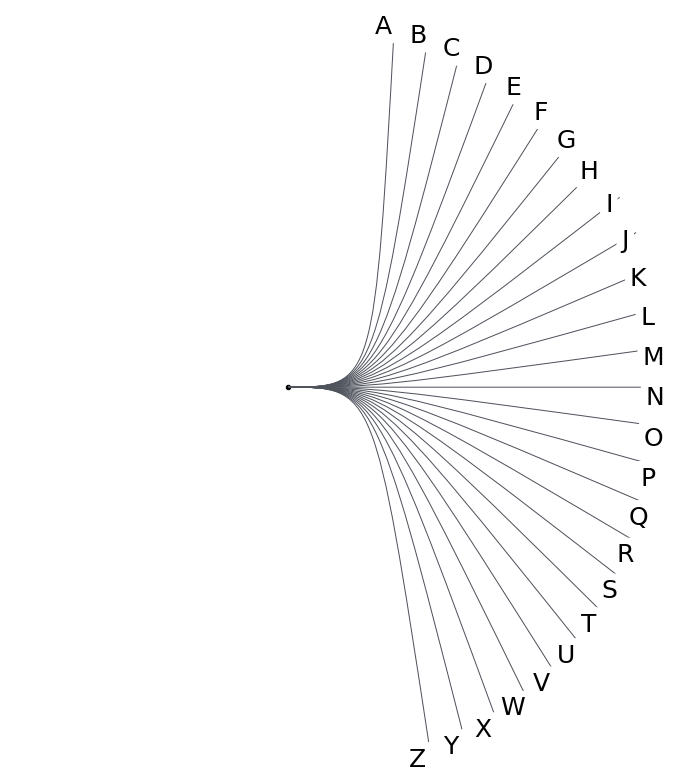

In [578]:
# calculate position for letters
n_dots = 59   # set number of dots
angs = np.linspace(0, 2*np.pi, n_dots)  # angles to the dots

ra = 30.0          # radius of circle
cx, cy = (ra, ra)  # center of circle
xs, ys = [], []    # for coordinates of points to plot


half_circle = list(angs[:14][::-1]) + list(angs[46:-1][::-1])
for ang in half_circle:
    x = cx + ra*np.cos(ang)
    y = cy + ra*np.sin(ang)
    xs.append(x)  
    ys.append(y)   

df["x_pos"] = xs
df["y_pos"] = ys


#===== PLOT to test
fig,ax = plt.subplots(figsize=(12, 14))

# plot points 
#ax.scatter(xs, ys, c = 'red', s=5)  
ax.scatter(cx-5,cy, c="black", s=20)


indent=8
for i in range(len(df)):
    x_pos = df["x_pos"].iloc[i]
    y_pos = df["y_pos"].iloc[i]
    
    #lines from center point outwards
    verts = [(cx-5, cy), (cx-5 +indent, cy), (cx-5 +indent, cy), (x_pos, y_pos)] 
    codes = [Path.MOVETO] + [Path.CURVE4] * 3
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor='#4F535C')
    ax.add_patch(patch)
    
    #plot data
    ax.text(x_pos + df["x_offset"].iloc[i], y_pos + df["y_offset"].iloc[i],df["letter"].iloc[i] , va="center",ha="center",
           fontsize=25,
           bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))


    
# configure axes

ax.set_ylim(-1, ra+ra+1)
ax.set_xlim(-1, ra+ra+1)
ax.axis("off")

plt.show()

# Explorations

In [9]:
#Input
root_kw = "why are bicycles "
keywords = [root_kw + c for c in ascii_lowercase]
country = "uk" 

In [13]:
#get all suggestions from Google
data = []
for kw in keywords:
    r = requests.get('http://suggestqueries.google.com/complete/search?output=toolbar&hl={}&q={}'.format(country,kw))
    soup = BeautifulSoup(r.content, 'html.parser')
    sugg = [sugg['data'] for sugg in soup.find_all('suggestion')]
    data.append(sugg[0:2])

In [14]:
data

[['why are bicycles allowed on the road', 'why are bicycles always exhausted'],
 ['why are bicycles better than cars', 'why are bicycles bad'],
 ['why are bicycles called eco-friendly vehicles', 'why are bikes cool'],
 ['why are bicycles dangerous', 'why are bikes dangerous'],
 ['why are bicycles expensive', 'why are electric bicycles used'],
 ['why are bikes fun', 'what are folding bicycle for'],
 ['why are bicycles good', 'why are bicycle good'],
 ['why are bicycle handlebars', 'why are bike helmet'],
 ['why are bicycles important', 'why are bicycles important in the giver'],
 ['why bicycle jersey'],
 ['what are bicycle kicks', 'what are bicycle kick'],
 ['why are bicycle lights', 'why are bike lanes important'],
 ['why are bicycles more expensive than motorcycles',
  'what are bicycle made of'],
 ['why are bicycles not suitable for all types of orders',
  'why bikes are not allowed on expressways'],
 ['why are specialized bikes on sale', 'why bike oil'],
 ['why are bicycles prohibit

In [15]:
#Input
root_kw = "why are cars "
keywords = [root_kw + c for c in ascii_lowercase]
country = "uk" 

In [17]:
#get all suggestions from Google
data = []
for kw in keywords:
    r = requests.get('http://suggestqueries.google.com/complete/search?output=toolbar&hl={}&q={}'.format(country,kw))
    soup = BeautifulSoup(r.content, 'html.parser')
    sugg = [sugg['data'] for sugg in soup.find_all('suggestion')]
    data.append(sugg[0:2])
    time.sleep(0.2)

In [18]:
data

[['why are cars abandoned in dubai',
  'why are cars aeroplanes and rockets streamlined'],
 ['why are cars bad for the environment', 'why are cars better than trucks'],
 ['why are cars called cars', 'why are cars called whips'],
 ['why are cars designed to crumple', 'why are cars dangerous'],
 ['why are cars expensive in the netherlands', 'why are cars expensive'],
 ['why are cars female', 'why are cars front wheel drive'],
 ['why are cars getting bigger', 'why are cars going electric'],
 ['why are cars harmful to the environment', 'why are cars helpful'],
 ['why are cars important', 'why are cars in cuba so old'],
 ['why are jdm cars popular', 'why are japanese cars cheap'],
 ['why are cars keyless', 'what are kit cars'],
 ['why are cars left hand drive', 'why are luxury cars cheap'],
 ['why are cars more expensive now',
  'why are cars made to go over the speed limit'],
 ['why are cars named after females', 'why are cars not made of aluminum'],
 ['why are cars on facebook marketplace

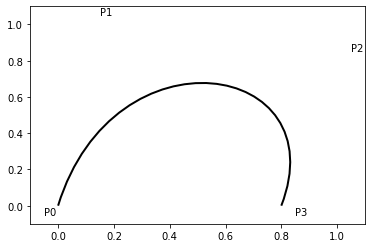

In [303]:
verts = [
   (0., 0.),   # P0
   (0.2, 1.),  # P1
   (1., 0.8),  # P2
   (0.8, 0.),  # P3
]

codes = [
    Path.MOVETO,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
]

path = Path(verts, codes)

fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)

xs, ys = zip(*verts)
#ax.plot(xs, ys, 'x--', lw=2, color='black', ms=10)

ax.text(-0.05, -0.05, 'P0')
ax.text(0.15, 1.05, 'P1')
ax.text(1.05, 0.85, 'P2')
ax.text(0.85, -0.05, 'P3')

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.show()

[(0, 1), (0.8, 1), (0.19999999999999996, 2), (1, 2)]
[1, 4, 4, 4]
Path(array([[15. , 20. ],
       [19.5, 20. ],
       [19.5, 20. ],
       [22. , 39. ]]), array([1, 4, 4, 4], dtype=uint8))


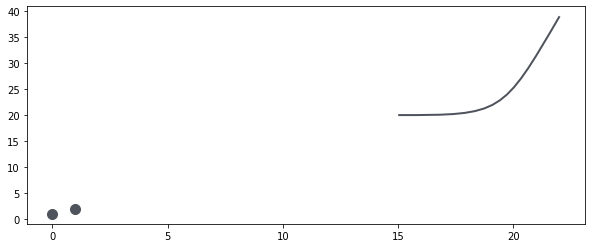

In [396]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np


t = np.array([[1, 2]])


fig, ax = plt.subplots(figsize=(10, 4))

indent = 0.8
for tj in t:
    ax.scatter(np.arange(len(tj)), tj, marker='o', color='#4F535C', s=100, zorder=3)
    
    # create bezier curves
    verts = [(i + d, tij) for i, tij in enumerate(tj) for d in (-indent, 0, indent)][1:-1]
    print(verts)
    
    indent = 4.5
    cx = 15
    cy = 20
    
    verts = [(cx, cy), (cx +indent, cy), (cx +indent, cy), (20, 40.0)] 
    verts = [(cx, cy), (cx +indent, cy), (cx +indent, cy), (22, 39)] 
    #verts = [(x_pos, 0), (-x_pos , 0), (2.4577658132942823-0, 19.848410193438713), (2.4577658132942823, 19.848410193438713)]
    
    codes = [Path.MOVETO] + [Path.CURVE4] * (len(verts) - 1)
    print(codes)
    path = Path(verts, codes)
    print(path)
    patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='#4F535C')
    ax.add_patch(patch)
#ax.set_xticks([])
#ax.set_yticks([])
ax.autoscale() # sets the xlim and ylim for the added patches
plt.show()